In [3]:
! nvidia-smi

Mon Sep 22 07:14:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import zipfile
import os

# Path to your dataset zip
zip_path = "/content/Faulty_solar_panel.zip"
extract_path = "/content/dataset"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)

Extracted to: /content/dataset


In [6]:
import os

train_data_dir = "/content/dataset/Faulty_solar_panel/train"
validation_data_dir="/content/dataset/Faulty_solar_panel/validation"


In [7]:
from pathlib import Path
import imghdr

data_dir = validation_data_dir

image_extensions = [".png", ".jpg", ".jpeg", ".bmp", ".gif"]  # allowed extensions
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]       # formats TensorFlow accepts

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"❌ {filepath} is not a valid image → deleting")
            filepath.unlink()  # delete file
        elif img_type not in img_type_accepted_by_tf:
            print(f"❌ {filepath} is {img_type}, not accepted by TensorFlow → deleting")
            filepath.unlink()  # delete file

/tmp/ipython-input-3129462633.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
from pathlib import Path
import imghdr

data_dir1 = train_data_dir

image_extensions = [".png", ".jpg", ".jpeg", ".bmp", ".gif"]  # allowed extensions
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]       # formats TensorFlow accepts

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"❌ {filepath} is not a valid image → deleting")
            filepath.unlink()  # delete file
        elif img_type not in img_type_accepted_by_tf:
            print(f"❌ {filepath} is {img_type}, not accepted by TensorFlow → deleting")
            filepath.unlink()  # delete file

In [9]:
import tensorflow as tf

train_dataset =tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=(224,224),
    batch_size=32,
    color_mode="rgb",
    label_mode="int",
    shuffle=True,
    interpolation="bilinear",
    crop_to_aspect_ratio=True,
    follow_links=True,
)

val_dataset= tf.keras.utils.image_dataset_from_directory(
    validation_data_dir,
    image_size=(224,224),
    batch_size=32,
    color_mode="rgb",
    label_mode="int",
    shuffle=True,
    interpolation="bilinear",
    crop_to_aspect_ratio=True,
    follow_links=True,
)


Found 869 files belonging to 6 classes.
Found 95 files belonging to 6 classes.


In [10]:
class_names = train_dataset.class_names
print("Class Names:", class_names)

Class Names: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


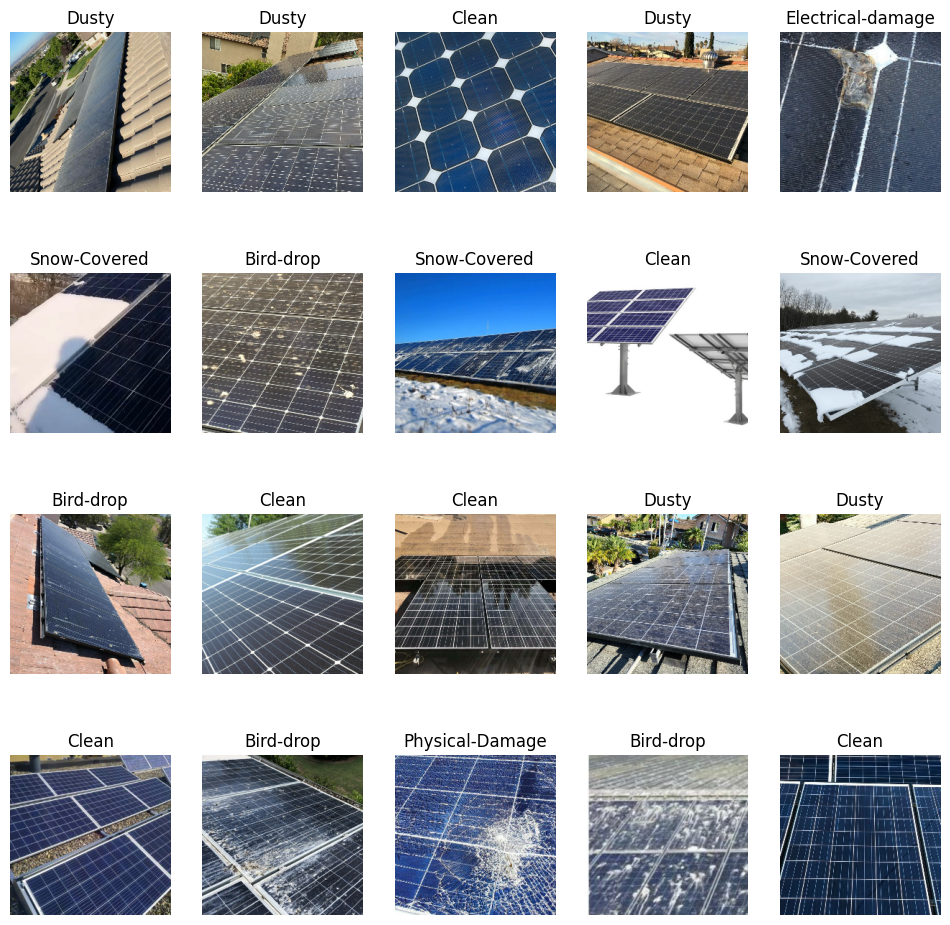

In [11]:
plt.figure(figsize=(12, 12))

for images, labels in train_dataset.take(1):   # 1 batch (e.g., 32 images)
    for i in range(20):   # show 20 images
        ax = plt.subplot(4, 5, i + 1)    # 4 rows x 5 cols = 20 slots
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
import math

batch_size = 32
num_samples = train_dataset.cardinality().numpy() * batch_size
num_batches = math.ceil(num_samples / batch_size)

print("Total images:", num_samples)
print("Batch size:", batch_size)
print("Number of batches:", num_batches)

Total images: 896
Batch size: 32
Number of batches: 28


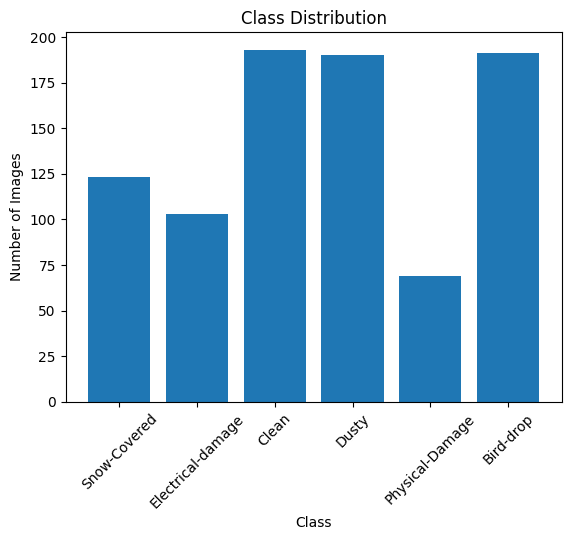

Class counts: {'Snow-Covered': 123, 'Electrical-damage': 103, 'Clean': 193, 'Dusty': 190, 'Physical-Damage': 69, 'Bird-drop': 191}


In [13]:
import os
import matplotlib.pyplot as plt

data_dir = "/content/dataset/Faulty_solar_panel/train"
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in os.listdir(data_dir)}

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

print("Class counts:", class_counts)

In [14]:
import cv2
import numpy as np

data_dir1 = "/content/dataset/Faulty_solar_panel/train/Bird-drop"

shapes = []

for file in os.listdir(data_dir1)[:100]:  # check first 100 images
    img = cv2.imread(os.path.join(data_dir1, file))
    shapes.append(img.shape)

shapes = np.array(shapes)
print("Average shape:", shapes.mean(axis=0))

Average shape: [709.65 782.51   3.  ]


tf.Tensor(
[[[ 78.89286   72.89286   60.67857 ]
  [ 80.17985   73.28699   63.0727  ]
  [ 79.34312   72.34312   63.299747]
  ...
  [ 69.243744  70.243744  62.243744]
  [ 71.03186   72.03186   64.03186 ]
  [ 76.22689   77.22689   69.22689 ]]

 [[ 74.03444   71.03444   54.03444 ]
  [ 75.10332   72.10332   56.66709 ]
  [ 77.07143   73.220665  60.772957]
  ...
  [ 68.25031   69.25031   61.250313]
  [ 58.285843  59.285843  51.285843]
  [ 66.56862   67.56862   59.568623]]

 [[ 79.07143   72.89286   55.82143 ]
  [ 79.        71.92857   57.535713]
  [ 79.71301   72.64158   58.746174]
  ...
  [ 62.602192  65.745155  58.032116]
  [ 61.474583  64.90307   57.123753]
  [ 64.51257   66.798355  59.28431 ]]

 ...

 [[253.40683  196.62143  161.69296 ]
  [252.68472  193.43509  158.43509 ]
  [253.78947  193.93254  156.93254 ]
  ...
  [213.25385  161.60822  137.00092 ]
  [212.75623  161.00616  140.7983  ]
  [213.94258  161.87105  143.43503 ]]

 [[255.       192.32147  156.32147 ]
  [255.       191.21814  1

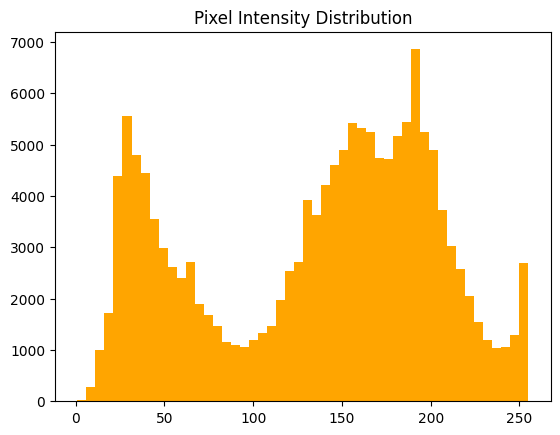

In [15]:
for images, _ in train_dataset.take(1):
    print(images[0],_[0])
    img = images[0].numpy().astype("uint8")
    plt.hist(img.ravel(), bins=50, color='orange')
    plt.title("Pixel Intensity Distribution")
    plt.show()
    break

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_ds   = val_dataset.map(lambda x, y: (normalization_layer(x), y))
# Optimize pipeline
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)

In [17]:
for images, labels in train_ds.take(1):
    print(images, labels)

tf.Tensor(
[[[[0.26892754 0.19153443 0.19493687]
   [0.24423124 0.17390415 0.17390415]
   [0.24978577 0.18935108 0.17971349]
   ...
   [0.09849024 0.09849024 0.10633337]
   [0.10895552 0.10895552 0.11679866]
   [0.11635092 0.11635092 0.12419406]]

  [[0.16893159 0.10716543 0.11072811]
   [0.32014623 0.25886956 0.25815177]
   [0.2454208  0.19159551 0.18731505]
   ...
   [0.10891796 0.10891796 0.1167611 ]
   [0.1045453  0.1045453  0.11238843]
   [0.10801864 0.10801864 0.11586178]]

  [[0.23037882 0.18679927 0.1803742 ]
   [0.28872418 0.24394853 0.23674951]
   [0.30740407 0.27011105 0.25437284]
   ...
   [0.13292499 0.13292499 0.13434306]
   [0.09606765 0.09606765 0.09748572]
   [0.09061133 0.09061133 0.0920294 ]]

  ...

  [[0.8987482  0.89482665 0.96399695]
   [0.8987482  0.89482665 0.957442  ]
   [0.90138    0.89745843 0.95994717]
   ...
   [0.10818222 0.14173396 0.26413974]
   [0.04453482 0.07894687 0.20806462]
   [0.02185423 0.05439572 0.19410904]]

  [[0.9045533  0.90419436 0.952688

In [18]:
# simple cnn

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # output layer
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 220, 220, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 373248)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    47,775,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,906,822 (182.75 MB)

 Trainable params: 47,906,822 (182.75 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # works with integer labels
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 49s 981ms/step - accuracy: 0.2073 - loss: 4.1887 - val_accuracy: 0.3158 - val_loss: 1.6676
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.3743 - loss: 1.5943 - val_accuracy: 0.4316 - val_loss: 1.6035
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.4663 - loss: 1.3602 - val_accuracy: 0.5684 - val_loss: 1.2524
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.5645 - loss: 1.1472 - val_accuracy: 0.6421 - val_loss: 0.9077
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.6756 - loss: 0.9040 - val_accuracy: 0.7474 - val_loss: 0.7662
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.7884 - loss: 0.6331 - val_accuracy: 0.8421 - val_loss: 0.6481
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.8434 - loss: 0.5378 - val_accuracy: 0.8842 - val_loss: 0.3586
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.9049 - loss: 0.3326 - val_accuracy: 0

In [22]:
# testing image

In [23]:
from tensorflow.keras.preprocessing import image

img_path="/content/dataset/Faulty_solar_panel/validation/Bird-drop/Bird (55).jpg"

img = image.load_img(img_path, target_size=(224, 224,3))

img = image.load_img(img_path, target_size=(224, 224))

# Convert to array
img_array = image.img_to_array(img)

# Add batch dimension (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Normalize
img_array = img_array / 255.0

# Predict
pred = model.predict(img_array)  # shape = (1, num_classes)
predicted_class = np.argmax(pred, axis=1)  # gives class index

class_names = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']

print("Predicted:", class_names[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: Bird-drop


Found 200 files belonging to 6 classes.
Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 615ms/step


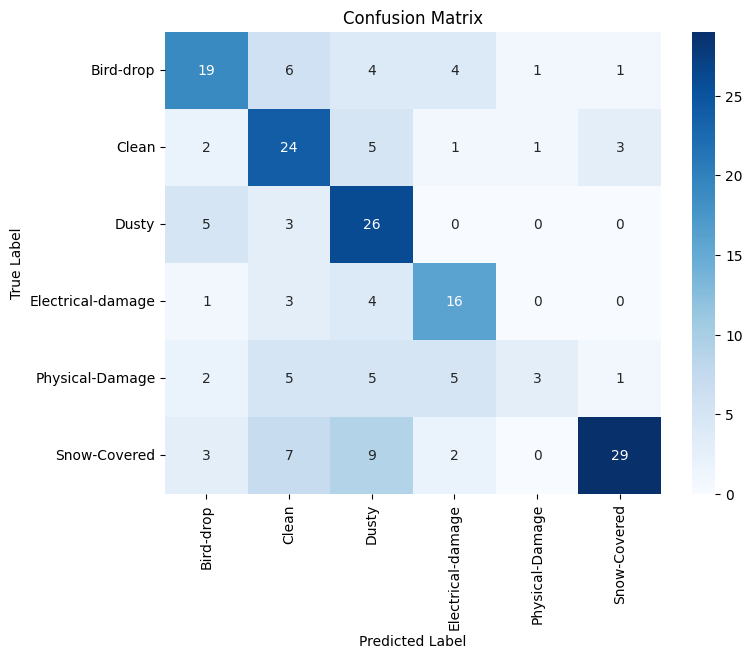

                   precision    recall  f1-score   support

        Bird-drop       0.59      0.54      0.57        35
            Clean       0.50      0.67      0.57        36
            Dusty       0.49      0.76      0.60        34
Electrical-damage       0.57      0.67      0.62        24
  Physical-Damage       0.60      0.14      0.23        21
     Snow-Covered       0.85      0.58      0.69        50

         accuracy                           0.58       200
        macro avg       0.60      0.56      0.55       200
     weighted avg       0.62      0.58      0.57       200



In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


# Load validation or test dataset (make sure labels are available)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/Faulty_solar_panel/test",  # update with your folder
    image_size=(224, 224),
    batch_size=32,
    shuffle=False   # important! keep order
)

class_names = val_ds.class_names


val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Get class names
print("Classes:", class_names)

# Make predictions
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print(classification_report(y_true, y_pred, target_names=class_names))

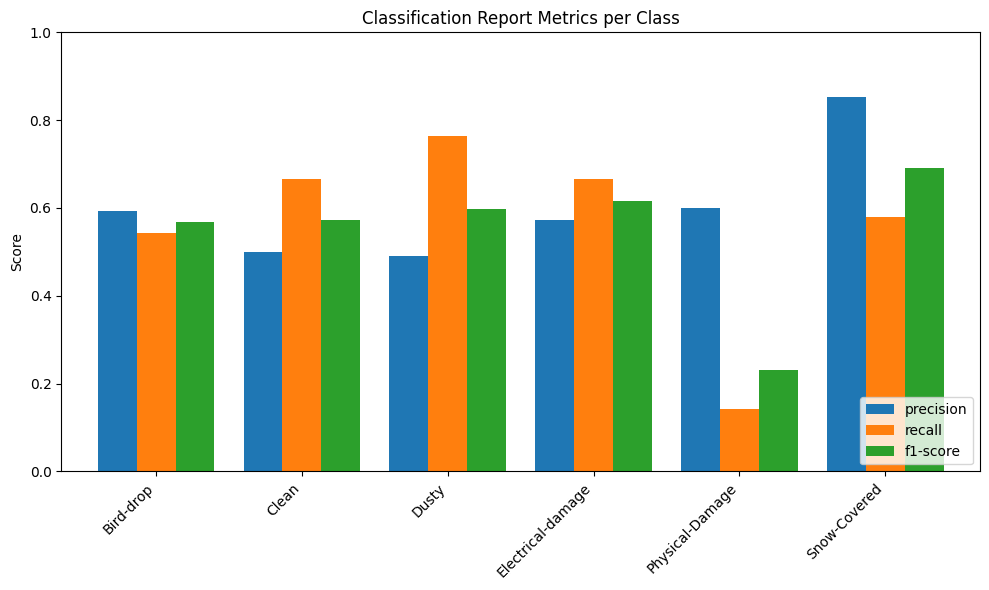

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report as dictionary
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert to DataFrame
df = pd.DataFrame(report).transpose()

# Drop summary rows if you only want per-class metrics
df_classes = df.iloc[:-3, :]

# Plot
df_classes[["precision", "recall", "f1-score"]].plot(
    kind="bar", figsize=(10,6), width=0.8
)

plt.title("Classification Report Metrics per Class")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

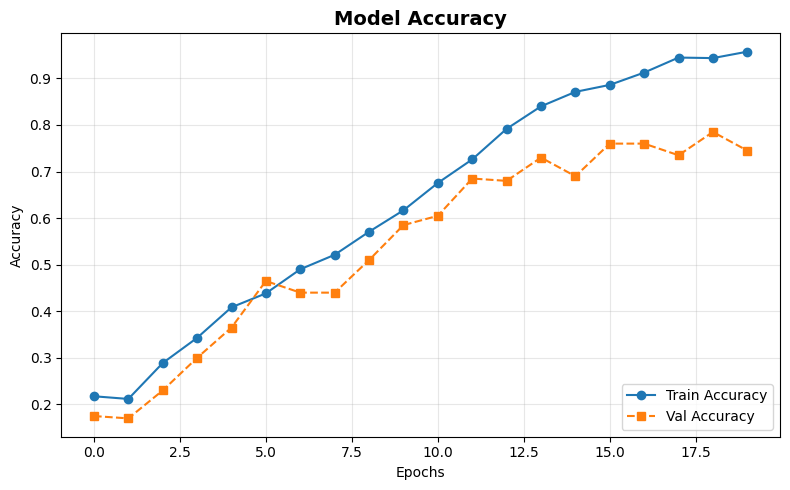

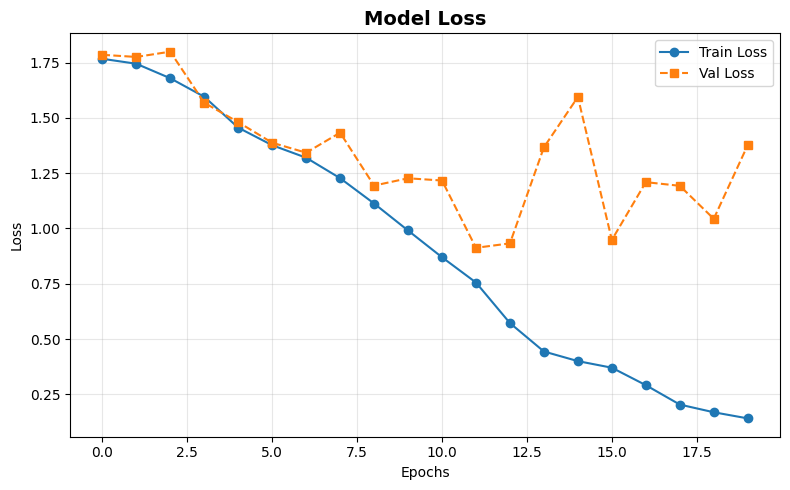

In [44]:
import matplotlib.pyplot as plt

# --- Accuracy Plot ---
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='s', linestyle='--')
plt.title("Model Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Val Loss', marker='s', linestyle='--')
plt.title("Model Loss", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

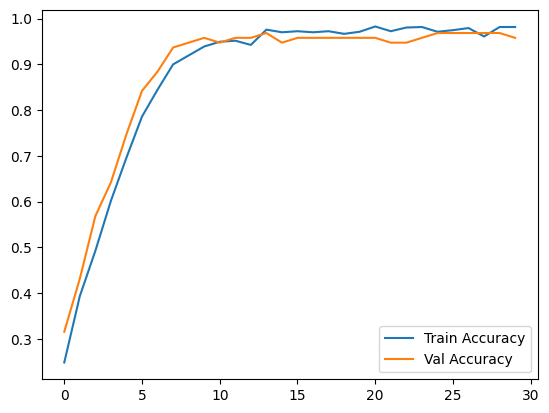

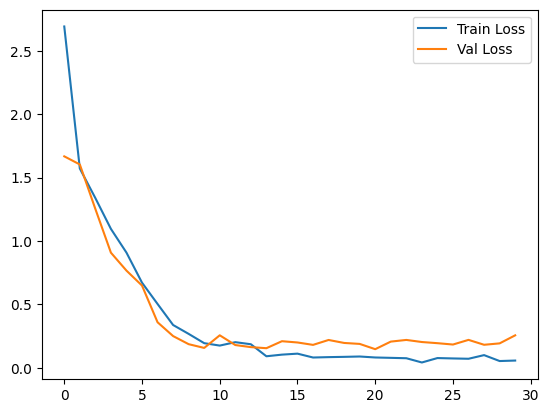

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [26]:
# simple cnn with agumentation

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, models

# -----------------------------
# Data augmentation
# -----------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# -----------------------------
# Model with Dropout + L2 Regularization
# -----------------------------
model1 = models.Sequential([
    data_augmentation,  # Apply augmentation during training
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),

    layers.Conv2D(32, (3,3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.MaxPooling2D(),
    layers.Dropout(0.25),   # Dropout

    layers.Conv2D(64, (3,3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(len(class_names), activation='softmax')  # final layer
])

# -----------------------------
# Compile
# -----------------------------
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Train with EarlyStopping + LR scheduler
# -----------------------------
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

history1 = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.2142 - loss: 2.1165 - val_accuracy: 0.1750 - val_loss: 1.9016 - learning_rate: 0.0010
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.2296 - loss: 1.8339 - val_accuracy: 0.1800 - val_loss: 1.8223 - learning_rate: 0.0010
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.2400 - loss: 1.7803 - val_accuracy: 0.1750 - val_loss: 1.8110 - learning_rate: 0.0010
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.2285 - loss: 1.7705 - val_accuracy: 0.1750 - val_loss: 1.8132 - learning_rate: 0.0010
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.2495 - loss: 1.7511 - val_accuracy: 0.1750 - val_loss: 1.8143 - learning_rate: 0.0010
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.2182 - loss: 1.7547
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.2182 - loss: 1.7546 - va

Found 200 files belonging to 6 classes.
Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step


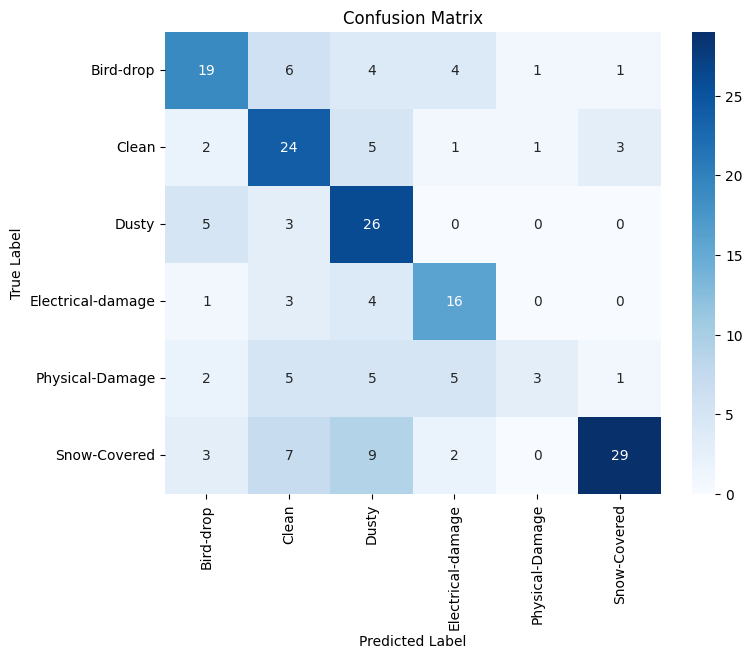

                   precision    recall  f1-score   support

        Bird-drop       0.59      0.54      0.57        35
            Clean       0.50      0.67      0.57        36
            Dusty       0.49      0.76      0.60        34
Electrical-damage       0.57      0.67      0.62        24
  Physical-Damage       0.60      0.14      0.23        21
     Snow-Covered       0.85      0.58      0.69        50

         accuracy                           0.58       200
        macro avg       0.60      0.56      0.55       200
     weighted avg       0.62      0.58      0.57       200



In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


# Load validation or test dataset (make sure labels are available)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/Faulty_solar_panel/test",  # update with your folder
    image_size=(224, 224),
    batch_size=32,
    shuffle=False   # important! keep order
)

class_names = test_ds.class_names


test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Get class names
print("Classes:", class_names)

# Make predictions
y_true1 = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs1 = model1.predict(test_ds)
y_pred1 = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm1 = confusion_matrix(y_true1, y_pred1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print(classification_report(y_true1, y_pred1, target_names=class_names))

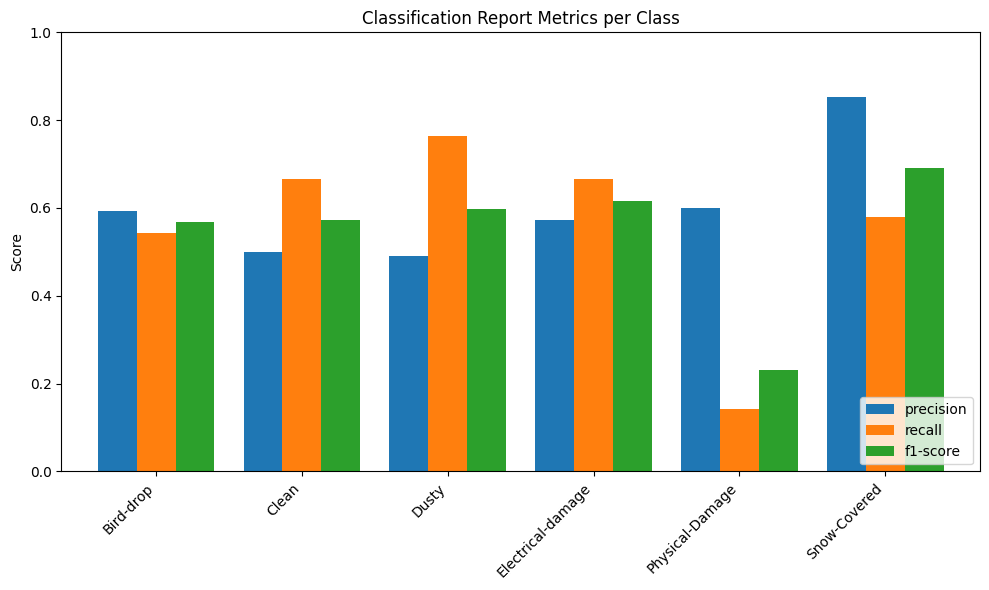

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report as dictionary
report = classification_report(y_true1, y_pred1, target_names=class_names, output_dict=True)

# Convert to DataFrame
df1 = pd.DataFrame(report).transpose()

# Drop summary rows if you only want per-class metrics
df_classes1 = df1.iloc[:-3, :]

# Plot
df_classes1[["precision", "recall", "f1-score"]].plot(
    kind="bar", figsize=(10,6), width=0.8
)

plt.title("Classification Report Metrics per Class")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

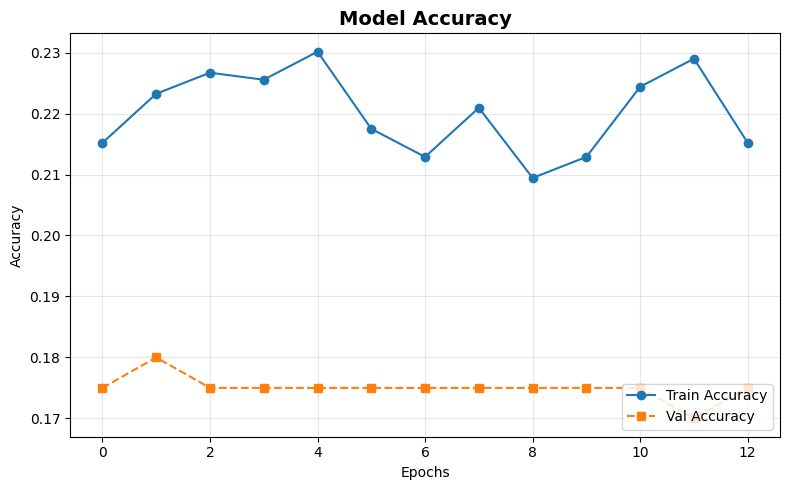

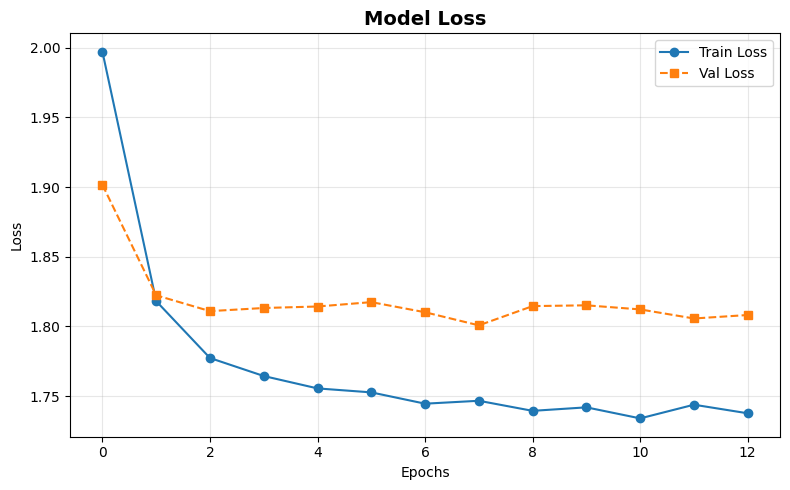

In [47]:
import matplotlib.pyplot as plt

# --- Accuracy Plot ---
plt.figure(figsize=(8,5))
plt.plot(history1.history['accuracy'], label='Train Accuracy', marker='o', linestyle='-')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy', marker='s', linestyle='--')
plt.title("Model Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'], label='Train Loss', marker='o', linestyle='-')
plt.plot(history1.history['val_loss'], label='Val Loss', marker='s', linestyle='--')
plt.title("Model Loss", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# vgg16

In [31]:
num_classes=len(class_names)

In [32]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential

# Data augmentation pipeline
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),   # randomly flip images
    layers.RandomRotation(0.1),        # rotate ±10%
    layers.RandomZoom(0.1),            # zoom in/out
    layers.RandomContrast(0.1)         # adjust contrast
])

# Input layer (RGB here, change to (224,224,1) if grayscale)
_input = Input((224,224,3))

# Apply augmentation
x = data_augmentation(_input)

# VGG16-style architecture
conv1  = Conv2D(64, (3,3), padding="same", activation="relu")(x)
conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(num_classes, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

In [33]:
from tensorflow.keras.optimizers import Adam


vgg16_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",   # use "sparse_categorical_crossentropy" if labels are integers
    metrics=["accuracy"]
)

In [48]:
history2 = vgg16_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 647ms/step - accuracy: 0.9477 - loss: 0.1619 - val_accuracy: 0.7500 - val_loss: 1.1353
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 640ms/step - accuracy: 0.9770 - loss: 0.0798 - val_accuracy: 0.6650 - val_loss: 2.1464
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 615ms/step - accuracy: 0.9681 - loss: 0.0997 - val_accuracy: 0.7000 - val_loss: 1.4526
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 704ms/step - accuracy: 0.9749 - loss: 0.0936 - val_accuracy: 0.7750 - val_loss: 1.0778
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 616ms/step - accuracy: 0.9734 - loss: 0.0791 - val_accuracy: 0.7850 - val_loss: 1.4100
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 613ms/step - accuracy: 0.9945 - loss: 0.0284 - val_accuracy: 0.7900 - val_loss: 1.5585
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 613ms/step - accuracy: 0.9947 - loss: 0.0156 - val_accuracy: 0.7900 - val_loss: 1.5532
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 711ms/step - accuracy: 0.9919 - loss: 0.0195 - val_accu

In [49]:
vgg16_model.evaluate(val_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.8032 - loss: 1.4092


[1.7682828903198242, 0.7950000166893005]

Found 200 files belonging to 6 classes.
Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 317ms/step


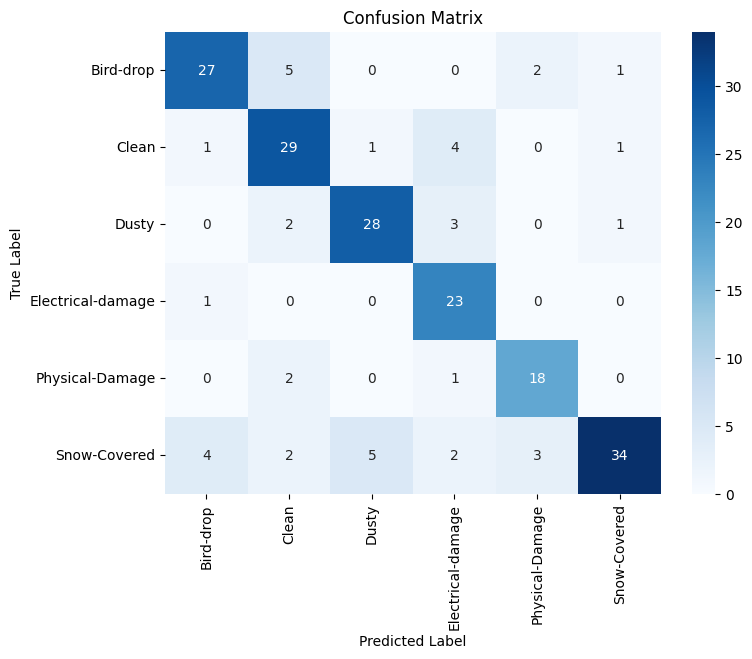

                   precision    recall  f1-score   support

        Bird-drop       0.82      0.77      0.79        35
            Clean       0.72      0.81      0.76        36
            Dusty       0.82      0.82      0.82        34
Electrical-damage       0.70      0.96      0.81        24
  Physical-Damage       0.78      0.86      0.82        21
     Snow-Covered       0.92      0.68      0.78        50

         accuracy                           0.80       200
        macro avg       0.79      0.82      0.80       200
     weighted avg       0.81      0.80      0.79       200



In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


# Load validation or test dataset (make sure labels are available)
test_ds1 = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/Faulty_solar_panel/test",  # update with your folder
    image_size=(224, 224),
    batch_size=32,
    shuffle=False   # important! keep order
)

class_names = test_ds1.class_names


test_ds1 = test_ds1.map(lambda x, y: (normalization_layer(x), y))

# Get class names
print("Classes:", class_names)

# Make predictions
y_true2 = np.concatenate([y for x, y in test_ds1], axis=0)
y_pred_probs2 = vgg16_model.predict(test_ds1)
y_pred2 = np.argmax(y_pred_probs2, axis=1)

# Confusion matrix
cm2 = confusion_matrix(y_true2, y_pred2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print(classification_report(y_true2, y_pred2, target_names=class_names))

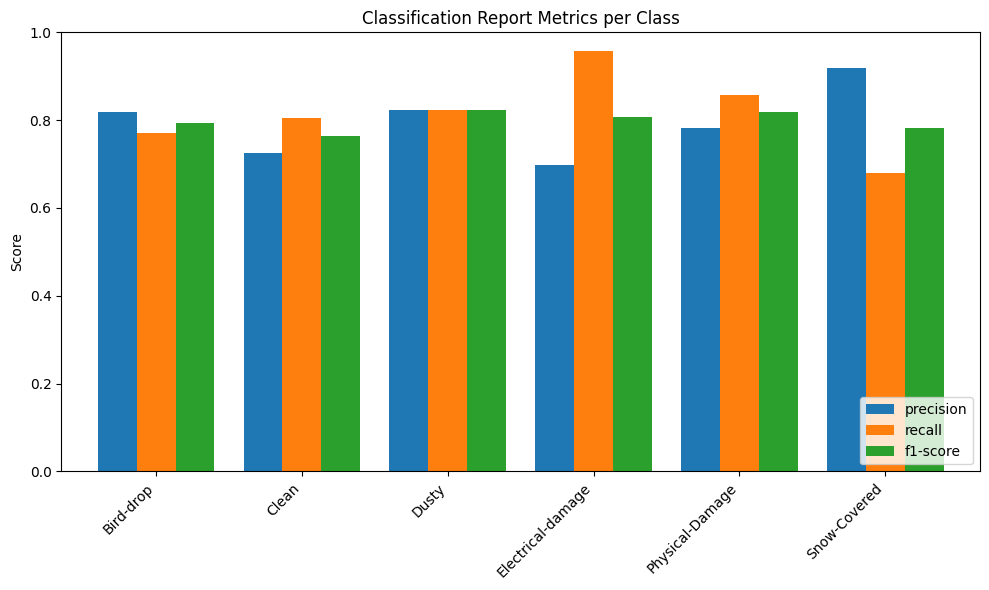

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report as dictionary
report2 = classification_report(y_true2, y_pred2, target_names=class_names, output_dict=True)

# Convert to DataFrame
df2 = pd.DataFrame(report2).transpose()

# Drop summary rows if you only want per-class metrics
df_classes2 = df2.iloc[:-3, :]

# Plot
df_classes2[["precision", "recall", "f1-score"]].plot(
    kind="bar", figsize=(10,6), width=0.8
)

plt.title("Classification Report Metrics per Class")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

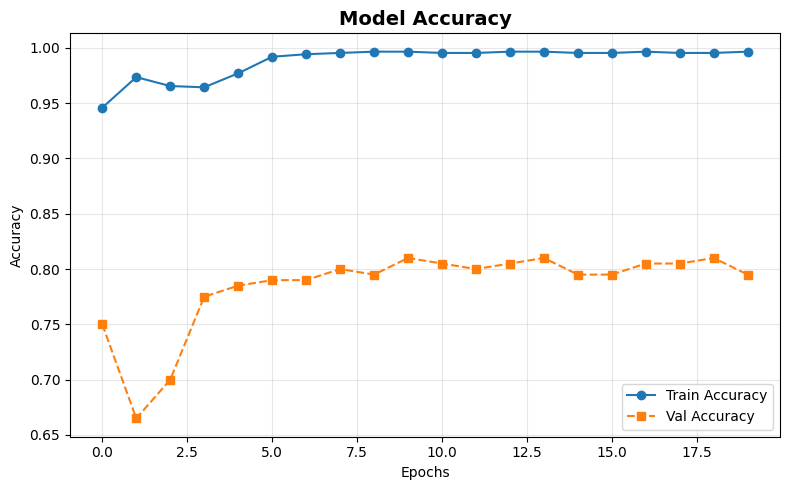

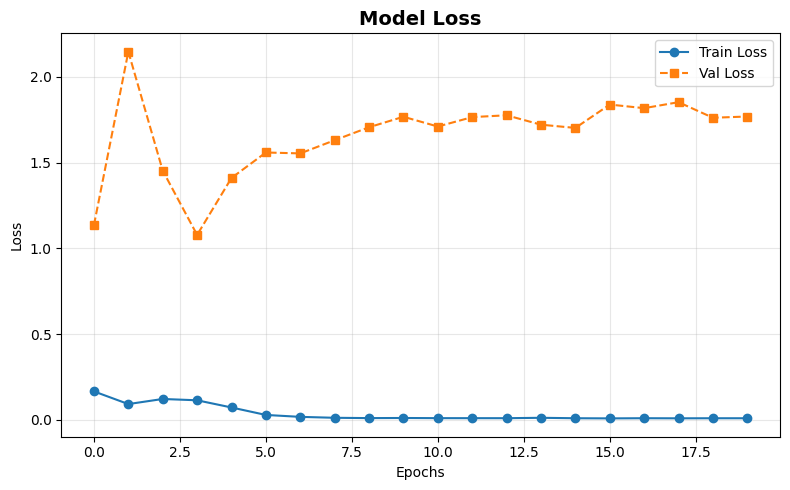

In [52]:
import matplotlib.pyplot as plt

# --- Accuracy Plot ---
plt.figure(figsize=(8,5))
plt.plot(history2.history['accuracy'], label='Train Accuracy', marker='o', linestyle='-')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy', marker='s', linestyle='--')
plt.title("Model Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history2.history['loss'], label='Train Loss', marker='o', linestyle='-')
plt.plot(history2.history['val_loss'], label='Val Loss', marker='s', linestyle='--')
plt.title("Model Loss", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
from tensorflow.keras.preprocessing import image

img_path="/content/dataset/Faulty_solar_panel/validation/Physical-Damage/Physical (108).jpg"
img = image.load_img(img_path, target_size=(224, 224,3))

img = image.load_img(img_path, target_size=(224, 224))

# Convert to array
img_array = image.img_to_array(img)

# Add batch dimension (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Normalize
img_array = img_array / 255.0

# Predict
pred = vgg16_model.predict(img_array)  # shape = (1, num_classes)
predicted_class = np.argmax(pred, axis=1)  # gives class index

class_names = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']

print("Predicted:", class_names[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted: Physical-Damage


In [56]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, models

# -----------------------------
# Data augmentation
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential

# Data augmentation pipeline
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),   # randomly flip images
    layers.RandomRotation(0.1),        # rotate ±10%
    layers.RandomZoom(0.1),            # zoom in/out
    layers.RandomContrast(0.1)         # adjust contrast
])

# Input layer (RGB here, change to (224,224,1) if grayscale)
_input = Input((224,224,3))

# Apply augmentation
x = data_augmentation(_input)

# VGG16-style architecture
conv1  = Conv2D(64, (3,3), padding="same", activation="relu")(x)
conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(num_classes, activation="softmax")(dense2)

vgg16_model1  = Model(inputs=_input, outputs=output)
# -----------------------------
# Compile
# -----------------------------
vgg16_model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Train with EarlyStopping + LR scheduler
# -----------------------------
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

history3 = vgg16_model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 779ms/step - accuracy: 0.2075 - loss: 2.1946 - val_accuracy: 0.1800 - val_loss: 1.8278 - learning_rate: 0.0010
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 569ms/step - accuracy: 0.2285 - loss: 1.7361 - val_accuracy: 0.1750 - val_loss: 1.8159 - learning_rate: 0.0010
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 574ms/step - accuracy: 0.2414 - loss: 1.7287 - val_accuracy: 0.1700 - val_loss: 1.7968 - learning_rate: 0.0010
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 578ms/step - accuracy: 0.2262 - loss: 1.7326 - val_accuracy: 0.1750 - val_loss: 1.8187 - learning_rate: 0.0010
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 552ms/step - accuracy: 0.2159 - loss: 1.7464 - val_accuracy: 0.1750 - val_loss: 1.8236 - learning_rate: 0.0010
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 606ms/step - accuracy: 0.2234 - loss: 1.7410 - val_accuracy: 0.1700 - val_loss: 1.7962 - learning_rate: 0.0010
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 554ms/step - accuracy: 0.1899 - loss: 1.

In [57]:
from tensorflow.keras.applications.resnet50 import preprocess_input
train_ds1 = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_ds1 = val_dataset.map(lambda x, y: (preprocess_input(x), y))

In [58]:
# resnet50

In [59]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

def build_resnet50(input_shape=(224, 224, 3), num_classes=28, multi_label=True):
    # Load base ResNet50
    base_model = ResNet50(
        include_top=False,        # remove original FC layers
        weights="imagenet",       # use pretrained ImageNet weights
        input_shape=input_shape
    )
    data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),   # randomly flip images
    layers.RandomRotation(0.1),        # rotate ±10%
    layers.RandomZoom(0.1),            # zoom in/out
    layers.RandomContrast(0.1)         # adjust contrast
        ])

    # Freeze base model (you can unfreeze later for fine-tuning)
    base_model.trainable = False

    # Add custom classification head
    inputs = tf.keras.Input(shape=input_shape)
    x=data_augmentation(inputs)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    if multi_label:
        outputs = layers.Dense(num_classes, activation="sigmoid")(x)  # multi-label
    else:
        outputs = layers.Dense(num_classes, activation="softmax")(x)  # single-label

    model = models.Model(inputs, outputs)
    return model


# Example usage
res_model = build_resnet50(input_shape=(224,224,3), num_classes=6, multi_label=True)

res_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",   # use categorical_crossentropy if softmax
    metrics=["accuracy"]
)
res_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │        12,294 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,600,006 (90.03 MB)

 Trainable params: 12,294 (48.02 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [60]:
history4 = res_model.fit(train_ds1, validation_data=val_ds1, epochs=5)


Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 956ms/step - accuracy: 0.1926 - loss: 3.4377 - val_accuracy: 0.2105 - val_loss: 2.0505
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - accuracy: 0.2178 - loss: 2.6351 - val_accuracy: 0.2632 - val_loss: 1.7667
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 404ms/step - accuracy: 0.2458 - loss: 2.4946 - val_accuracy: 0.4000 - val_loss: 1.5422
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 392ms/step - accuracy: 0.3006 - loss: 2.2845 - val_accuracy: 0.5158 - val_loss: 1.3728
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - accuracy: 0.3482 - loss: 2.0218 - val_accuracy: 0.5684 - val_loss: 1.2561


In [64]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import layers, models

# ------------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

def preprocess(images, labels):
    return preprocess_input(images), labels  # ResNet50 expects [-1,1] scaling

train_ds = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds = train_dataset.map(preprocess)
val_ds = val_dataset.map(preprocess)

# Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# ------------------------------
# 3. Build ResNet50 Model
# ------------------------------
def build_resnet50(input_shape=(224,224,3), num_classes=10, multi_label=False):
    base_model = ResNet50(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape
    )
    base_model.trainable = False  # freeze base

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)

    if multi_label:
        outputs = layers.Dense(num_classes, activation="sigmoid")(x)
        loss = "binary_crossentropy"
    else:
        outputs = layers.Dense(num_classes, activation="softmax")(x)
        loss = "sparse_categorical_crossentropy"

    model = models.Model(inputs, outputs)
    return model, loss


multi_label = False  # change to True if images can have multiple labels
res_model, loss_fn = build_resnet50(
    input_shape=(224,224,3),
    num_classes=num_classes,
    multi_label=multi_label
)

# ------------------------------
# 4. Compile & Train (Frozen Base)
# ------------------------------
res_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=loss_fn,
    metrics=["accuracy"]
)

print("\n Training with frozen ResNet50...")
history = res_model.fit(train_ds, validation_data=val_ds, epochs=5)

# ------------------------------
# 5. Fine-tuning (Unfreeze Last Block)
# ------------------------------
print("\n Fine-tuning last ResNet50 block...")

for layer in res_model.layers[1].layers[-30:]:   # unfreeze last ~30 layers
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

res_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # smaller LR
    loss=loss_fn,
    metrics=["accuracy"]
)

history_finetune = res_model.fit(train_ds, validation_data=val_ds, epochs=10)

# ------------------------------
# 6. Evaluation
# ------------------------------
val_loss, val_acc = model.evaluate(val_ds)
print(f"\n Final Validation Accuracy: {val_acc:.4f}")


 Training with frozen ResNet50...
Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 690ms/step - accuracy: 0.2624 - loss: 2.6596 - val_accuracy: 0.6842 - val_loss: 0.8911
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 396ms/step - accuracy: 0.6257 - loss: 1.1875 - val_accuracy: 0.8105 - val_loss: 0.6412
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 453ms/step - accuracy: 0.7213 - loss: 0.8929 - val_accuracy: 0.8105 - val_loss: 0.5158
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 395ms/step - accuracy: 0.7281 - loss: 0.8220 - val_accuracy: 0.8737 - val_loss: 0.4094
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 440ms/step - accuracy: 0.8119 - loss: 0.6120 - val_accuracy: 0.8632 - val_loss: 0.3739

 Fine-tuning last ResNet50 block...
Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 38s 749ms/step - accuracy: 0.8199 - loss: 0.5367 - val_accuracy: 0.9368 - val_loss: 0.2365
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 402ms/step - accuracy: 0.8407 - loss: 0.4619 - val_accuracy: 0.9684 - val_loss: 0.1592
Epoch 3/10
28/28 ━━━━━━━━━━━━━

Found 200 files belonging to 6 classes.
Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step


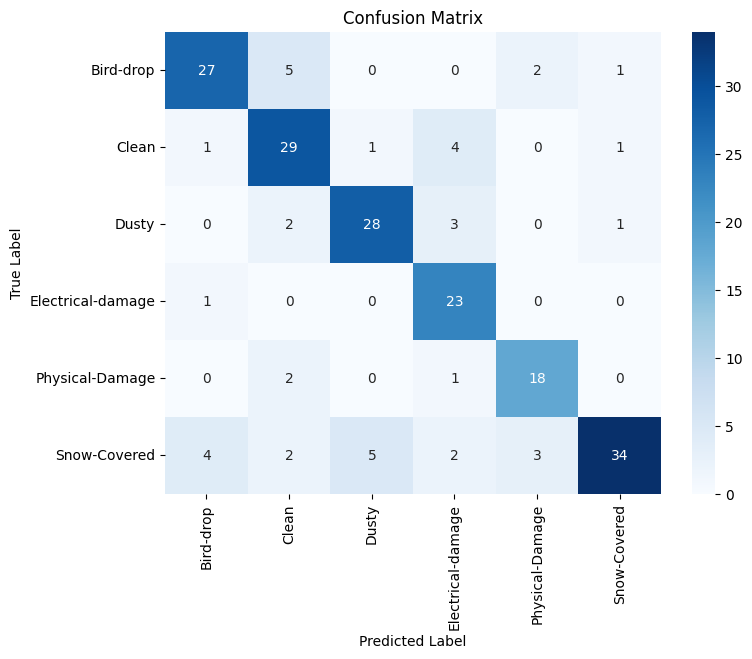

                   precision    recall  f1-score   support

        Bird-drop       0.82      0.77      0.79        35
            Clean       0.72      0.81      0.76        36
            Dusty       0.82      0.82      0.82        34
Electrical-damage       0.70      0.96      0.81        24
  Physical-Damage       0.78      0.86      0.82        21
     Snow-Covered       0.92      0.68      0.78        50

         accuracy                           0.80       200
        macro avg       0.79      0.82      0.80       200
     weighted avg       0.81      0.80      0.79       200



In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


# Load validation or test dataset (make sure labels are available)
test_ds3 = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/Faulty_solar_panel/test",  # update with your folder
    image_size=(224, 224),
    batch_size=32,
    shuffle=False   # important! keep order
)

class_names = test_ds3.class_names


test_ds3 = test_ds3.map(lambda x, y: (normalization_layer(x), y))

# Get class names
print("Classes:", class_names)

# Make predictions
y_true3 = np.concatenate([y for x, y in test_ds3], axis=0)
y_pred_probs3 = vgg16_model.predict(test_ds3)
y_pred3= np.argmax(y_pred_probs3, axis=1)

# Confusion matrix
cm3 = confusion_matrix(y_true3, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print(classification_report(y_true3, y_pred3, target_names=class_names))

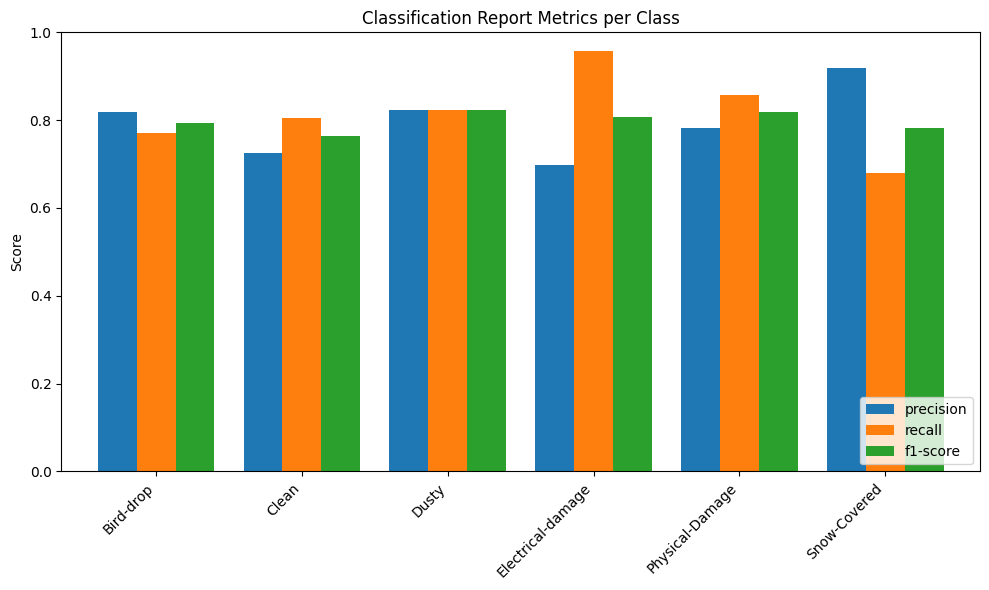

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report as dictionary
report3 = classification_report(y_true3, y_pred3, target_names=class_names, output_dict=True)

# Convert to DataFrame
df2 = pd.DataFrame(report3).transpose()

# Drop summary rows if you only want per-class metrics
df_classes3 = df2.iloc[:-3, :]

# Plot
df_classes3[["precision", "recall", "f1-score"]].plot(
    kind="bar", figsize=(10,6), width=0.8
)

plt.title("Classification Report Metrics per Class")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

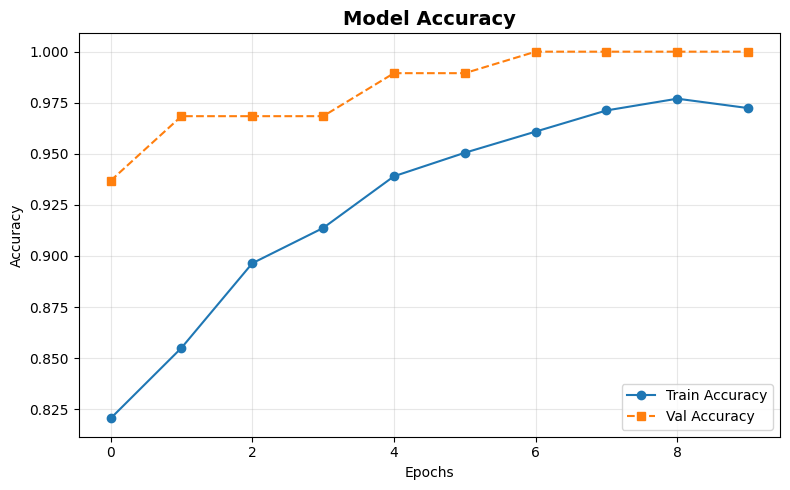

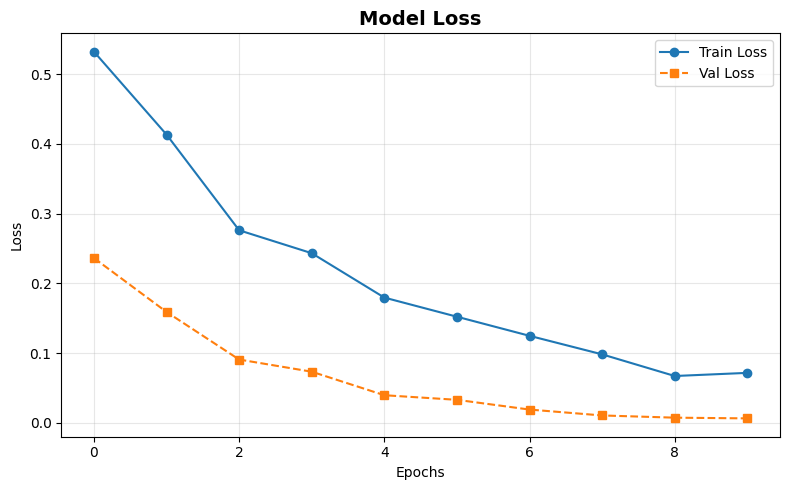

In [72]:
import matplotlib.pyplot as plt

# --- Accuracy Plot ---
plt.figure(figsize=(8,5))
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy', marker='o', linestyle='-')
plt.plot(history_finetune.history['val_accuracy'], label='Val Accuracy', marker='s', linestyle='--')
plt.title("Model Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history_finetune.history['loss'], label='Train Loss', marker='o', linestyle='-')
plt.plot(history_finetune.history['val_loss'], label='Val Loss', marker='s', linestyle='--')
plt.title("Model Loss", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [70]:
from tensorflow.keras.preprocessing import image

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

img_path="/content/dataset/Faulty_solar_panel/test/Snow-Covered/Solar (101).jpg"


def predict_single_image(model, img_path, class_names, target_size=(224,224)):
    # Load image
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)        # Convert to numpy array
    x = np.expand_dims(x, axis=0)      # Add batch dimension
    x = preprocess_input(x)            # ResNet50 preprocessing ([-1,1] scaling)

    # Predict
    preds = model.predict(x)
    y_pred = np.argmax(preds,axis=1)

    pred_class = class_names[y_pred[0]]  # Get class label
    confidence = np.max(preds)
    return pred_class, confidence

In [71]:
predict_single_image(res_model,img_path,class_names,target_size=(224,224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


('Snow-Covered', np.float32(0.99835914))

In [73]:
#MobileNetV2

In [75]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


# Build MobileNetV2 model
# -----------------------------
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze backbone

inputs = layers.Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

mobilenet_model = models.Model(inputs, outputs)

mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

mobilenet_model.summary()

# -----------------------------
# Train
# -----------------------------
history1 = mobilenet_model.fit(train_ds, validation_data=val_ds, epochs=10)

# -----------------------------
# Fine-tuning (optional)
print("\n🔹 Fine-tuning last ResNet50 block...")

for layer in mobilenet_model.layers[1].layers[-30:]:   # unfreeze last ~30 layers
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # smaller LR
    loss=loss_fn,
    metrics=["accuracy"]
)

history_finetune1 = mobilenet_model.fit(train_ds, validation_data=val_ds, epochs=10)

# ------------------------------
# 6. Evaluation
# ------------------------------
val_loss, val_acc = mobilenet_model.evaluate(val_ds)
print(f"\n✅ Final Validation Accuracy: {val_acc:.4f}")

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 846ms/step - accuracy: 0.2316 - loss: 2.2211 - val_accuracy: 0.3158 - val_loss: 1.5504
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 398ms/step - accuracy: 0.4290 - loss: 1.4947 - val_accuracy: 0.4947 - val_loss: 1.2276
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 401ms/step - accuracy: 0.6226 - loss: 1.0851 - val_accuracy: 0.6632 - val_loss: 0.9951
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.6388 - loss: 1.0383 - val_accuracy: 0.6842 - val_loss: 0.8811
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 387ms/step - accuracy: 0.6923 - loss: 0.8595 - val_accuracy: 0.7158 - val_loss: 0.7902
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 416ms/step - accuracy: 0.6925 - loss: 0.8859 - val_accuracy: 0.7368 - val_loss: 0.7664
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 391ms/step - accuracy: 0.7419 - loss: 0.7693 - val_accuracy: 0.7684 - val_loss: 0.7131
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 409ms/step - accuracy: 0.7717 - loss: 0.6980 - val_accu

In [76]:
mobilenet_model.evaluate(val_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.9594 - loss: 0.2154


[0.2307494729757309, 0.9578947424888611]

Found 200 files belonging to 6 classes.
Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step


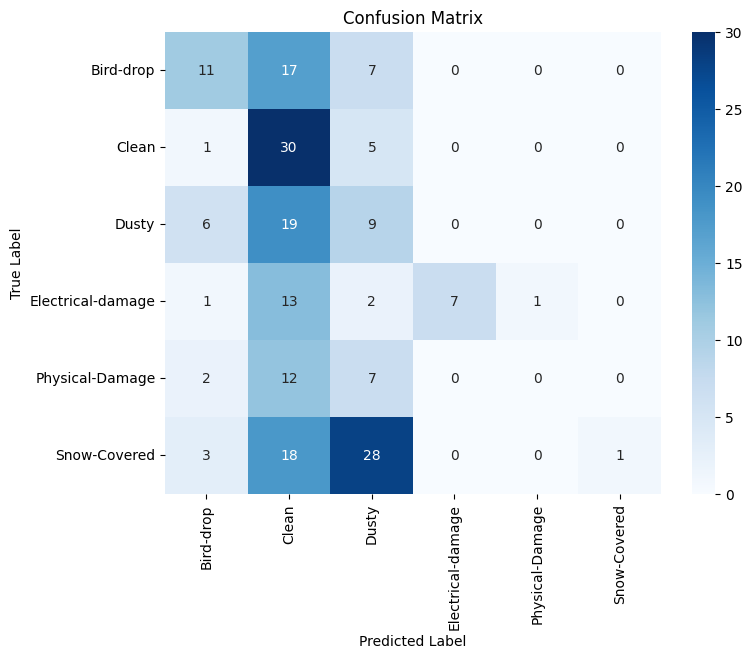

                   precision    recall  f1-score   support

        Bird-drop       0.46      0.31      0.37        35
            Clean       0.28      0.83      0.41        36
            Dusty       0.16      0.26      0.20        34
Electrical-damage       1.00      0.29      0.45        24
  Physical-Damage       0.00      0.00      0.00        21
     Snow-Covered       1.00      0.02      0.04        50

         accuracy                           0.29       200
        macro avg       0.48      0.29      0.25       200
     weighted avg       0.53      0.29      0.24       200



In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


# Load validation or test dataset (make sure labels are available)
val_data2 = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/Faulty_solar_panel/test",  # update with your folder
    image_size=(224, 224),
    batch_size=32,
    shuffle=False   # important! keep order
)

# Get class names
class_names = val_data2.class_names
print("Classes:", class_names)

test_ds5 = val_data2.map(lambda x, y: (normalization_layer(x), y))


# Make predictions
y_true5 = np.concatenate([y for x, y in test_ds5], axis=0)
y_pred_probs5 = mobilenet_model.predict(test_ds5)
y_pred5 = np.argmax(y_pred_probs5,axis=1)

# Confusion matrix
cm5 = confusion_matrix(y_true5, y_pred5)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print(classification_report(y_true5, y_pred5, target_names=class_names))

In [ ]:
img_path1=r"C:\Users\HP\Desktop\mini project1\solar panel\Dataset\Electrical (23).jpg"

predict_single_image(mobilenet_model,img_path1,class_names,target_size=(224,224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


('Electrical-damage', np.float32(0.9071058))